## Importing necessary libraries|

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import neural_structured_learning as nsl
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Loading Mnist digits dataset

In [2]:
(train_images, train_labels),(test_images, test_labels) = tf.keras.datasets.mnist.load_data()

## Data Visualization

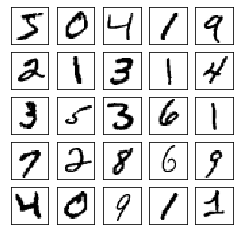

In [3]:
plt.figure(figsize=(4,4))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap='binary')
plt.show()

## Data Preprocessing

In [4]:
print("train_images shape: ", train_images.shape)
print("test images shape: ",test_images.shape)
print("train labels shape: ",train_labels.shape)
print("test labels shape: ",test_labels.shape)

train_images shape:  (60000, 28, 28)
test images shape:  (10000, 28, 28)
train labels shape:  (60000,)
test labels shape:  (10000,)


In [5]:
# Input shape

x_train = train_images[:,:,:,np.newaxis]
x_test = test_images[:,:,:,np.newaxis]
print("train_images shape: ", x_train.shape)
print("test images shape: ",x_test.shape)

# Normalization
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

# Converting labels into category
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

train_images shape:  (60000, 28, 28, 1)
test images shape:  (10000, 28, 28, 1)


## Model Structure

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D,Dropout

In [7]:
def create_model0():
    model = Sequential([
        Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128,activation='relu'),
        Dropout(0.2),
        Dense(10,activation='softmax')
    ])
    
    adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
    adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)
    
    return adv_model

In [8]:
def create_model1():
    model = Sequential([
        Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform',input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128,activation='relu', kernel_initializer='he_uniform'),
        Dropout(0.2),
        Dense(10,activation='softmax')
    ])
    
    adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
    adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)
    
    return adv_model

In [9]:
def create_model2():
    model = Sequential([
        Conv2D(32,(3,3),activation='relu',kernel_initializer = 'he_uniform',input_shape=(28,28,1)),
        MaxPooling2D((2,2)),
        Conv2D(64,(3,3),activation='relu',kernel_initializer = 'he_uniform'),
        Conv2D(64,(3,3),activation='relu',kernel_initializer = 'he_uniform'),
        MaxPooling2D((2,2)),
        Flatten(),
        Dense(128,activation='relu', kernel_initializer='he_uniform'),
        Dropout(0.2),
        Dense(10,activation='softmax')
    ])
    
    adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
    adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)
    
    return adv_model

In [10]:
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [11]:
def plot_accuracy_and_loss_graphs(history):
    acc = history.history['categorical_accuracy']
    val_acc = history.history['val_categorical_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    val_scaled_adversarial_loss = history.history['val_scaled_adversarial_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()
    
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.plot(epochs, val_scaled_adversarial_loss, 'g',label='val_scaled_adversarial_loss')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.figure()

    plt.show()

In [12]:
def plot_predictions():
    plt.figure(figsize=(10,10))
    for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      plt.imshow(test_images[i],cmap='binary')
      plt.title("Actual: "+str(test_labels[i])+" | Predicted: "+str(y_pred[i].argmax()))

    plt.tight_layout()
    plt.show()

In [13]:
def compile_model(model, epochs=5):
    model.compile(optimizer='adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
#     history = model.fit({'feature': x_train, 'label': y_train}, epochs=5, batch_size = 32,shuffle=True,validation_split=0.2,
#                        verbose=2)
    history = model.fit({'feature': x_train, 'label': y_train}, epochs=epochs, batch_size = 32)
    scores = model.evaluate({'feature': x_test, 'label': y_test},verbose=0)
    print("\nTest Data Accuracy: ")
    print(scores[2])
#     print("\nTest Data Accuracy: ".format(str(scores[2])))
    
#     plot_accuracy_and_loss_graphs(history)
    
#     y_pred = model.predict(x_test)
    
#     plot_predictions(y_pred)

In [14]:
model_A = create_model0()
compile_model(model_A,epochs=6)

Epoch 1/6
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2384 - categorical_crossentropy: 0.1955 - categorical_accuracy: 0.9415 - scaled_adversarial_loss: 0.0429
Epoch 2/6
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0955 - categorical_crossentropy: 0.0777 - categorical_accuracy: 0.9767 - scaled_adversarial_loss: 0.0178
Epoch 3/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0642 - categorical_crossentropy: 0.0520 - categorical_accuracy: 0.9835 - scaled_adversarial_loss: 0.0122
Epoch 4/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0489 - categoric

In [15]:
model_B = create_model1()
compile_model(model_B,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2141 - categorical_crossentropy: 0.1759 - categorical_accuracy: 0.9472 - scaled_adversarial_loss: 0.0382
Epoch 2/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0799 - categorical_crossentropy: 0.0648 - categorical_accuracy: 0.9801 - scaled_adversarial_loss: 0.0151
Epoch 3/6
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0549 - categorical_crossentropy: 0.0440 - categorical_accuracy: 0.9863 - scaled_adversarial_loss: 0.0109
Epoch 4/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0374 - categorical_crossentropy: 0.0296 - categorical_accuracy: 0.9902 - scaled_adversarial_loss: 0.0078
Epoch 5/6
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0295 - categorical_crossentropy: 0.0232 - categorical_accuracy: 0.9921 - scaled_adversarial_loss: 0.0064
Epoch 6/6
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0241 - c

In [16]:
model_C = create_model2()
compile_model(model_C,epochs=6)

Epoch 1/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.1688 - categorical_crossentropy: 0.1390 - categorical_accuracy: 0.9575 - scaled_adversarial_loss: 0.0298
Epoch 2/6
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0574 - categorical_crossentropy: 0.0468 - categorical_accuracy: 0.9858 - scaled_adversarial_loss: 0.0106
Epoch 3/6
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0404 - categorical_crossentropy: 0.0327 - categorical_accuracy: 0.9899 - scaled_adversarial_loss: 0.0077
Epoch 4/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0309 - categorical_crossentropy: 0.0248 - categorical_accuracy: 0.9922 - scaled_adversarial_loss: 0.0061
Epoch 5/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0248 - categorical_crossentropy: 0.0197 - categorical_accuracy: 0.9936 - scaled_adversarial_loss: 0.0051
Epoch 6/6
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0192 - 

## Basic

In [17]:
import tensorflow as tf
import neural_structured_learning as nsl

# Prepare data.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create a base model -- sequential, functional, or subclass.
model = tf.keras.Sequential([
    tf.keras.Input((28, 28), name='feature'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Wrap the model with adversarial regularization.
adv_config = nsl.configs.make_adv_reg_config(multiplier=0.2, adv_step_size=0.05)
adv_model = nsl.keras.AdversarialRegularization(model, adv_config=adv_config)

# Compile, train, and evaluate.
adv_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
adv_model.fit({'feature': x_train, 'label': y_train}, batch_size=32, epochs=5)
adv_model.evaluate({'feature': x_test, 'label': y_test})

Epoch 1/5


1875/1875 [==============================] - 3s 2ms/step - loss: 0.3132 - sparse_categorical_crossentropy: 0.2561 - sparse_categorical_accuracy: 0.9270 - scaled_adversarial_loss: 0.0571
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1391 - sparse_categorical_crossentropy: 0.1124 - sparse_categorical_accuracy: 0.9671 - scaled_adversarial_loss: 0.0267
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0954 - sparse_categorical_crossentropy: 0.0766 - sparse_categorical_accuracy: 0.9763 - scaled_adversarial_loss: 0.0188
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0727 - sparse_categorical_crossentropy: 0.0580 - sparse_categorical_accuracy: 0.9823 - scaled_adversarial_loss: 0.0147
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0561 - sparse_categorical_crossentropy: 0.0444 - sparse_categorical_accuracy: 0.9865 - scaled_adversarial_loss: 0.0117


313/313 [==============================] - 0s 2ms/step - loss: 0.0886 - sparse_categorical_crossentropy: 0.0708 - sparse_categorical_accuracy: 0.9783 - scaled_adversarial_loss: 0.0178


[0.08864056318998337,
 0.07080133259296417,
 0.9782999753952026,
 0.01783919706940651]